In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

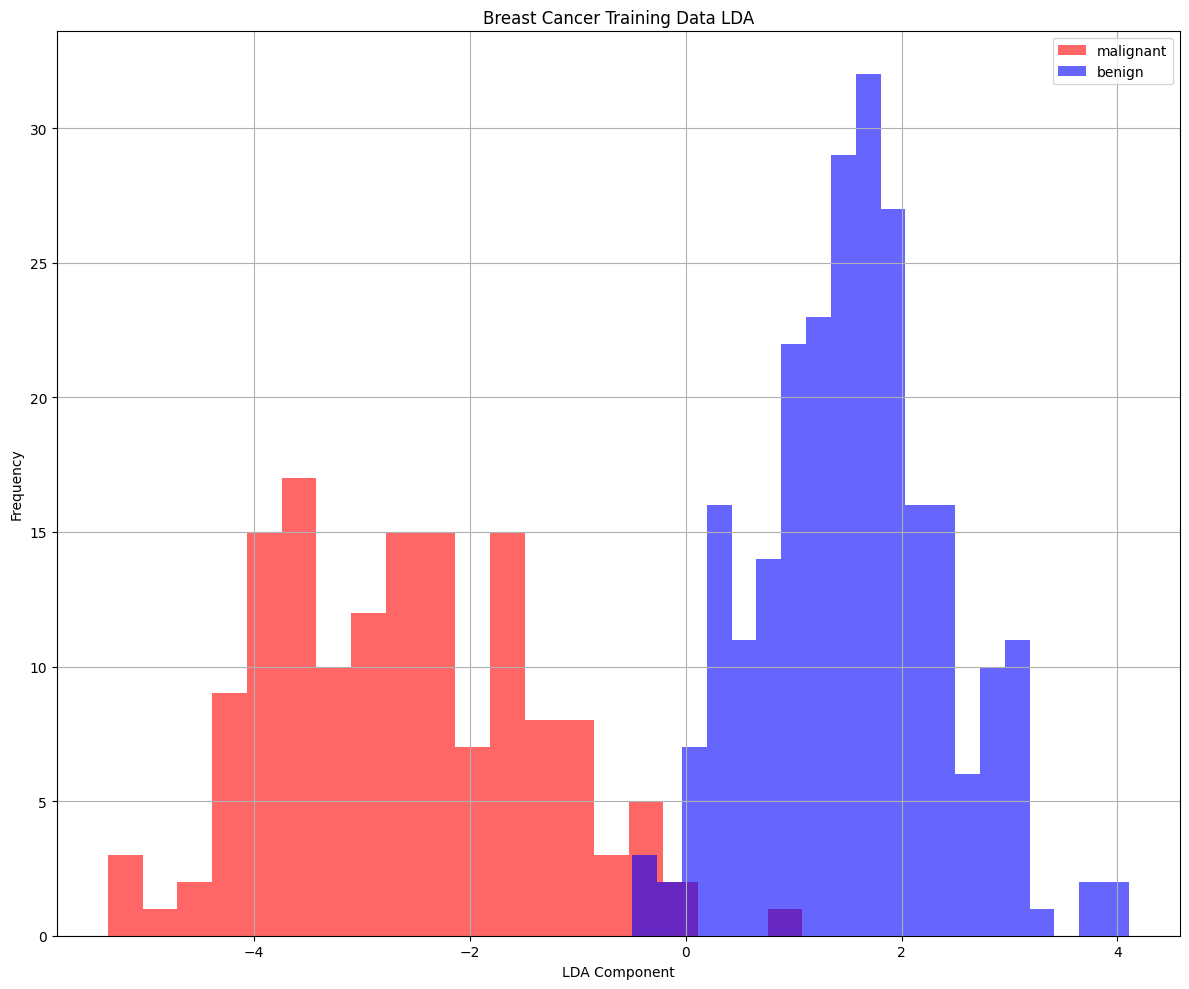

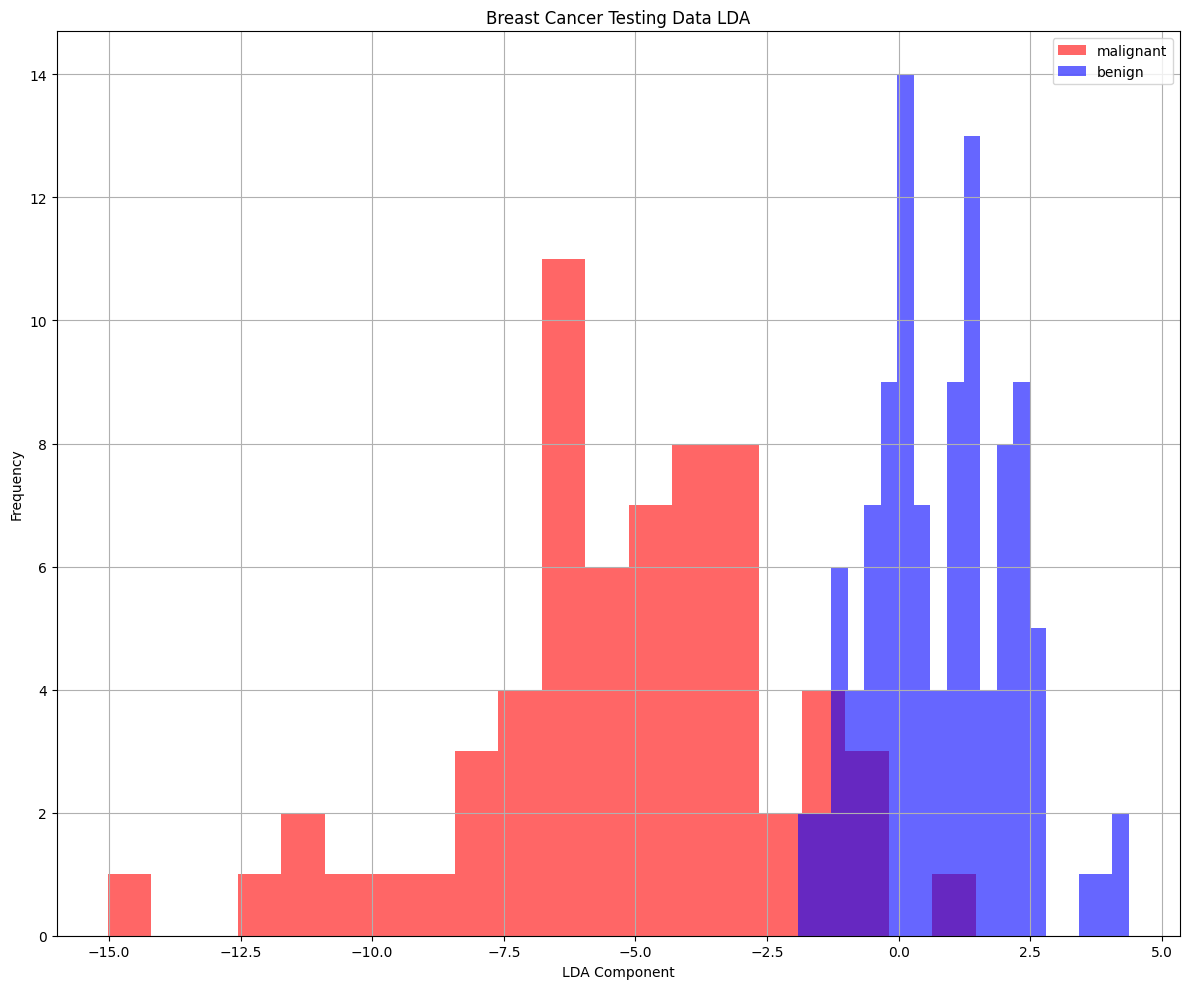

[I 2025-04-27 11:21:55,297] A new study created in memory with name: no-name-efb983b3-2aff-4f6c-9001-eb9e4be6d6fa
[I 2025-04-27 11:21:55,331] Trial 0 finished with value: 0.9547468354430381 and parameters: {'C': 5.166764620683439, 'kernel': 'rbf', 'gamma': 0.0001009439454304832, 'max_iter': 1524}. Best is trial 0 with value: 0.9547468354430381.
/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=7813).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=7813).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=7813).  Consider pre-processing 

Best trial:
Accuracy: 0.9924683544303798
Best hyperparameters:  {'C': 0.29113247608408566, 'kernel': 'sigmoid', 'gamma': 0.7081950253636242, 'max_iter': 1974}


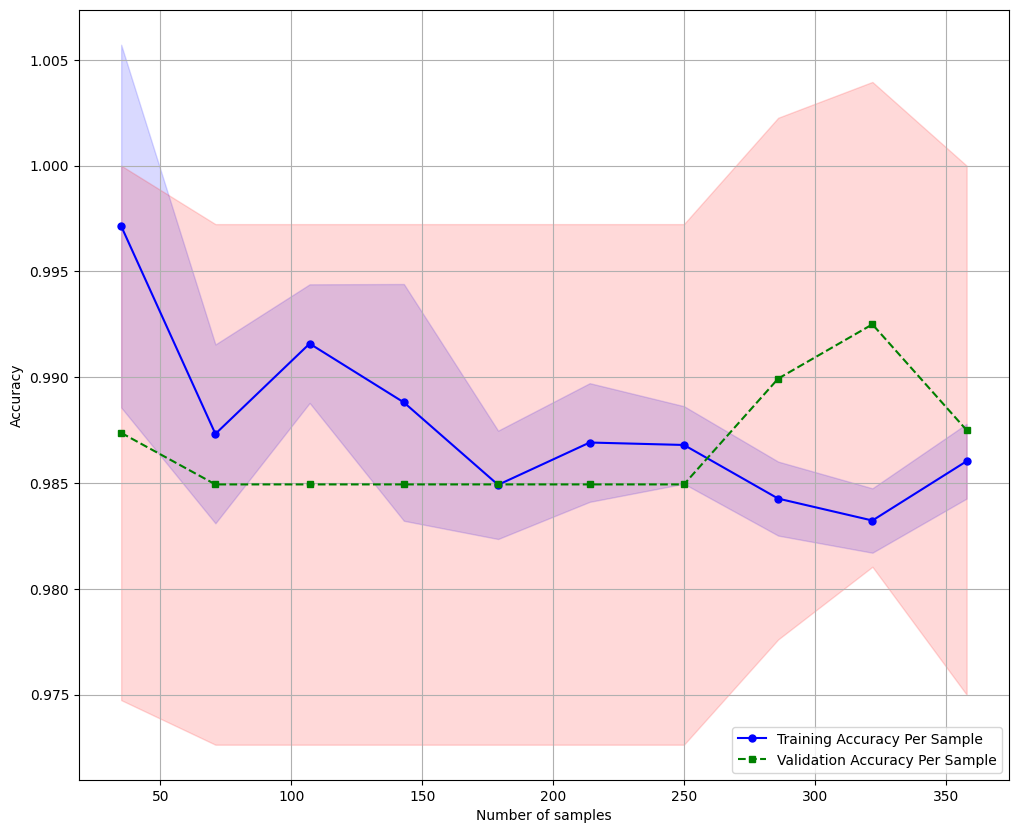

Confusion Matrix
[[62  2]
 [20 87]]
Accuracy: 0.8713, Precision: 0.9775, Recall: 0.8131, F1: 0.8878, AUC: 0.9806


In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(X_train_scaled, X_test_scaled, y_train, y_test, 'lda', {})

helper.train_and_evaluate_model('svc', X_train_feature_extracted, X_test_feature_extracted, y_train, y_test)